In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# WallStreet Bets

Link do subreddit: https://www.reddit.com/r/wallstreetbets/

In [6]:
url = 'https://tradestie.com/api/v1/apps/reddit'
response = requests.get(url)

acoes = pd.DataFrame(response.json())
acoes

,no_of_comments,sentiment,sentiment_score,ticker
0,18,Bullish,0.040,TSLA
1,12,Bullish,0.176,AMC
2,11,Bearish,-0.032,AI
3,9,Bullish,0.048,NVDA
4,9,Bullish,0.447,QQQ
5,7,Bullish,0.306,NIO
6,7,Bullish,0.105,CGC
7,5,Bullish,0.370,CC
8,5,Bullish,0.164,AMD
9,5,Bearish,0.000,AAPL


In [7]:
tickers = acoes[acoes['sentiment_score'] > 0.1]['ticker'].tolist()
tickers

['AMC',
 'QQQ',
 'NIO',
 'CGC',
 'CC',
 'AMD',
 'CCIV',
 'ES',
 'SAFE',
 'ELF',
 'COO',
 'VC',
 'FSD',
 'ONE',
 'UFO',
 'TR',
 'TOPS',
 'FCF']

# Yahoo Finance

In [8]:
import yfinance as yf

data = yf.download(tickers, start="2021-01-01")
data

[*********************100%%**********************]  18 of 18 completed


2 Failed downloads:
['CCIV', 'ONE']: Exception('%ticker%: No timezone found, symbol may be delisted')


Adj Close                                                     \
                  AMC         AMD         CC CCIV        CGC         COO   
Date                                                                       
2021-01-04  20.100000   92.300003  22.772757  NaN  26.120001  357.085938   
2021-01-05  19.799999   92.769997  24.194910  NaN  27.040001  361.293884   
2021-01-06  20.100000   90.330002  25.745508  NaN  30.170000  366.131531   
2021-01-07  20.500000   95.160004  25.589533  NaN  30.610001  364.882141   
2021-01-08  21.400000   94.580002  25.259230  NaN  30.170000  363.053040   
...               ...         ...        ...  ...        ...         ...   
2023-09-13   8.240000  107.709999  31.549999  NaN   1.160000  344.630005   
2023-09-14   8.140000  106.629997  32.330002  NaN   1.250000  340.119995   
2023-09-15   8.360000  101.489998  31.850000  NaN   1.350000  342.359985   
2023-09-18   7.800000  102.370003  31.540001  NaN   1.140000  337.459991   
2023-09-19   7.515000         NaN  31.580000  NaN   1.141500  336.234985   

                                                         ...   Volume          \
                   ELF         ES        FCF        FSD  ...      FCF     FSD   
Date                                                     ...                    
2021-01-04   25.100000  78.309509   9.918244  11.218300  ...   736900  186300   
2021-01-05   25.209999  78.874763  10.009403  11.249098  ...   493400  149200   
2021-01-06   24.209999  82.590538  10.957472  11.241396  ...  1564800  142800   
2021-01-07   23.740000  82.053101  11.057747  11.318394  ...   814000  115700   
2021-01-08   23.400000  83.702499  10.829848  11.364590  ...   460200   46000   
...                ...        ...        ...        ...  ...      ...     ...   
2023-09-13  131.990005  63.349998  12.410000  10.910000  ...   474500  103300   
2023-09-14  130.179993  64.440002  12.790000  10.900000  ...   581000  140400   
2023-09-15  125.769997  64.209999  12.560000  10.910000  ...  2191700  151800   
2023-09-18  123.000000  64.290001  12.320000  10.920000  ...   434600  113800   
2023-09-19  120.175003  64.309998  12.320000  10.850000  ...    47730   45974   

                                                                             
                  NIO ONE       QQQ     SAFE    TOPS      TR    UFO      VC  
Date                                                                         
2021-01-04  213109700 NaN  45305900   106438  106185  226413  34400  208400  
2021-01-05  147474800 NaN  29323400    84621  381410  370434  19300  141100  
2021-01-06  176397700 NaN  52809600   224279  150330  200625  29700  291400  
2021-01-07  119429200 NaN  30394800   113054  305220  215267  34100  231700  
2021-01-08  218512800 NaN  33955800   145308  235405  218764  32400  407800  
...               ...  ..       ...      ...     ...     ...    ...     ...  
2023-09-13   36890000 NaN  46300700   683300  431400   92800   4300  349500  
2023-09-14   26475900 NaN  48039400   546300  185600   74800   3500  360000  
2023-09-15   40061100 NaN  69757700  3557300  262500  405500   3500  672800  
2023-09-18   21684200 NaN  36849100   680500  332300   73300   3300  208300  
2023-09-19   37049275 NaN   6593428    27985   74668     921    391   25272  

[682 rows x 108 columns]

### Podemos baixar também apenas uma ação

Se quisermos uma ação da BOVESPA, podemos usar o código da ação + .SA

In [9]:
petrobras = yf.download('PETR4.SA', start="2010-01-01")
petrobras

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,36.950001,37.320000,36.820000,37.320000,11.118155,13303600
2010-01-05,37.380001,37.430000,36.799999,37.000000,11.022825,21396400
2010-01-06,36.799999,37.500000,36.799999,37.500000,11.171782,18720600
2010-01-07,37.270000,37.450001,37.070000,37.150002,11.067512,10964600
2010-01-08,37.160000,37.389999,36.860001,36.950001,11.007930,14624200
...,...,...,...,...,...,...
2023-09-13,33.650002,33.700001,33.029999,33.029999,33.029999,47685700
2023-09-14,33.099998,34.000000,33.099998,33.869999,33.869999,46502100
2023-09-15,33.869999,33.990002,33.610001,33.889999,33.889999,54801500


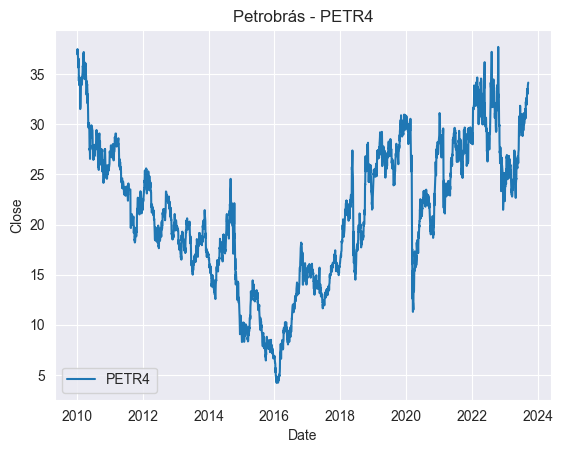

In [10]:
sns.lineplot(data=petrobras, x=petrobras.index, y='Close', label='PETR4').set(title='Petrobrás - PETR4')
sns.set(rc={'figure.figsize':(12, 5)})

Qual e quando foi o preço máximo da ação? E o mais baixo? Qual a média por ano? e por mês?

In [11]:
petrobras[petrobras['Close'] == petrobras['Close'].max()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-21,36.450001,38.389999,36.389999,37.720001,26.555786,139601400


In [12]:
petrobras[petrobras['Close'] == petrobras['Close'].min()]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-26,4.23,4.31,4.12,4.2,1.489209,71933300


In [13]:
petrobras['Close'].resample('Y').mean()

Date
2010-12-31    29.715101
2011-12-31    23.824606
2012-12-31    21.316245
2013-12-31    18.246774
2014-12-31    16.679153
2015-12-31     9.798008
2016-12-31    10.772610
2017-12-31    14.605276
2018-12-31    21.000081
2019-12-31    27.247016
2020-12-31    22.303710
2021-12-31    26.861943
2022-12-31    30.669080
2023-12-31    27.555667
Freq: A-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

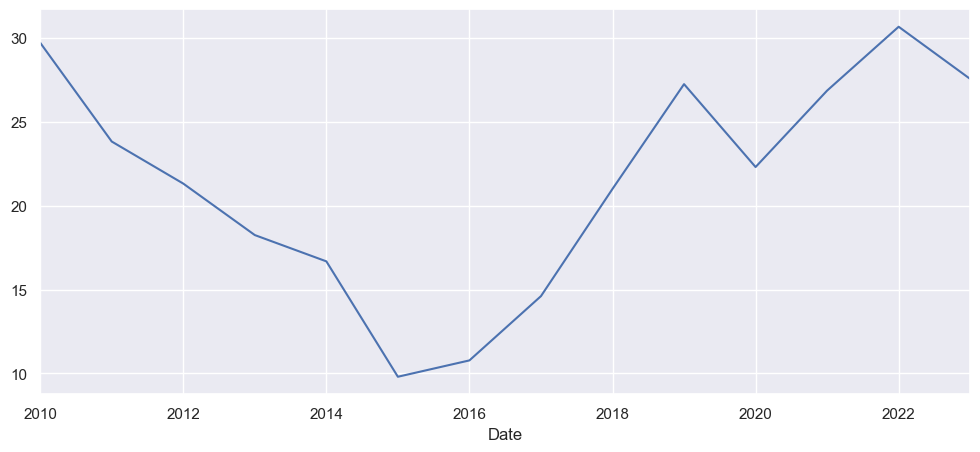

In [14]:
petrobras['Close'].resample('Y').mean().plot()

In [15]:
petrobras['Close'].resample('M').mean()

Date
2010-01-31    35.846316
2010-02-28    33.616666
2010-03-31    35.949566
2010-04-30    34.169500
2010-05-31    29.050952
                ...    
2023-05-31    25.359091
2023-06-30    29.759524
2023-07-31    29.730000
2023-08-31    31.204783
2023-09-30    33.432500
Freq: M, Name: Close, Length: 165, dtype: float64

<Axes: xlabel='Date'>

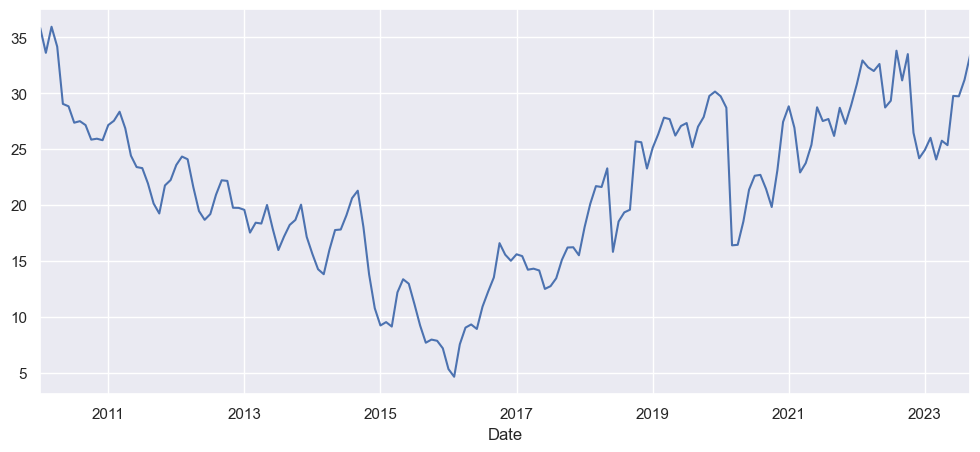

In [16]:
petrobras['Close'].resample('M').mean().plot()

In [17]:
petrobras['Close'].resample('W').mean()


Date
2010-01-10    37.184000
2010-01-17    36.182000
2010-01-24    35.492001
2010-01-31    34.197500
2010-02-07    33.252000
                ...    
2023-08-27    31.662000
2023-09-03    32.384001
2023-09-10    33.145000
2023-09-17    33.537999
2023-09-24    34.145000
Freq: W-SUN, Name: Close, Length: 716, dtype: float64

<Axes: xlabel='Date'>

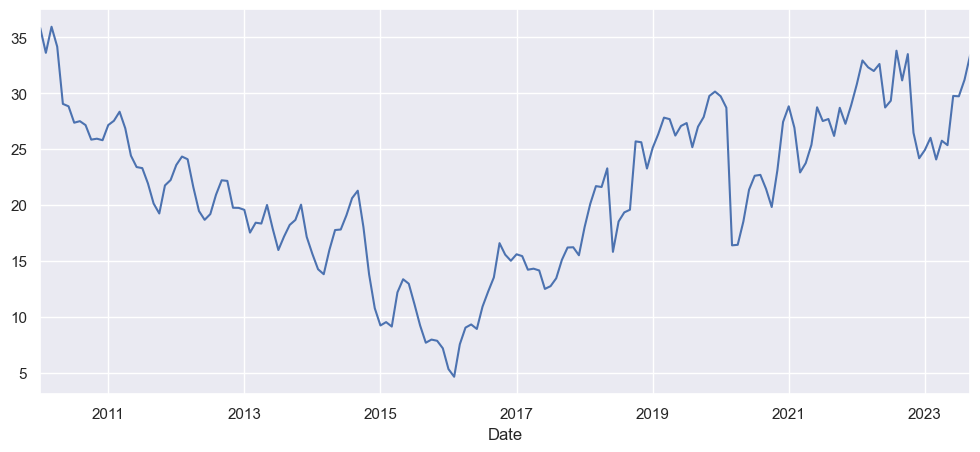

In [18]:
petrobras['Close'].resample('M').mean().plot()


### Cálculo de médias móveis

In [19]:
petrobras['Close'].rolling(7).mean()

Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
                ...    
2023-09-13    33.215714
2023-09-14    33.441428
2023-09-15    33.515714
2023-09-18    33.602857
2023-09-19    33.711428
Name: Close, Length: 3405, dtype: float64

<Axes: xlabel='Date'>

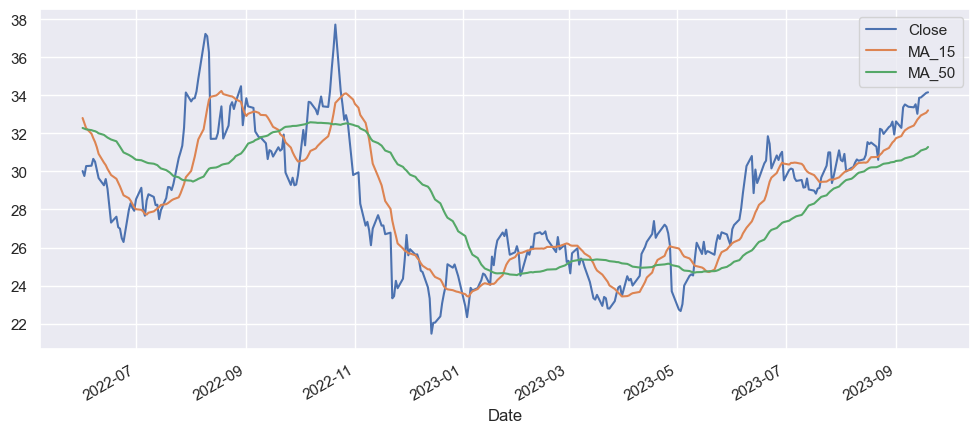

In [20]:
petrobras['MA_15'] = petrobras['Close'].rolling(15).mean()
petrobras['MA_50'] = petrobras['Close'].rolling(50).mean()

petrobras_2206 = petrobras[petrobras.index >= '2022-06-01']
petrobras_2206[['Close', 'MA_15', 'MA_50']].plot()

### Cálculo de médias móveis exponenciais

In [21]:
petrobras['Close'].ewm(span=7, adjust=False).mean()

Date
2010-01-04    37.320000
2010-01-05    37.240000
2010-01-06    37.305000
2010-01-07    37.266250
2010-01-08    37.187188
                ...    
2023-09-13    33.128288
2023-09-14    33.313715
2023-09-15    33.457786
2023-09-18    33.625840
2023-09-19    33.759380
Name: Close, Length: 3405, dtype: float64

/var/folders/ns/bgqhy0js3djctln1yxdwt23r0000gn/T/ipykernel_84202/1387100033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petrobras_2206['EMA_15'] = petrobras['Close'].ewm(span=15, adjust=False).mean()
/var/folders/ns/bgqhy0js3djctln1yxdwt23r0000gn/T/ipykernel_84202/1387100033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petrobras_2206['EMA_50'] = petrobras['Close'].ewm(span=50, adjust=False).mean()


<Axes: xlabel='Date'>

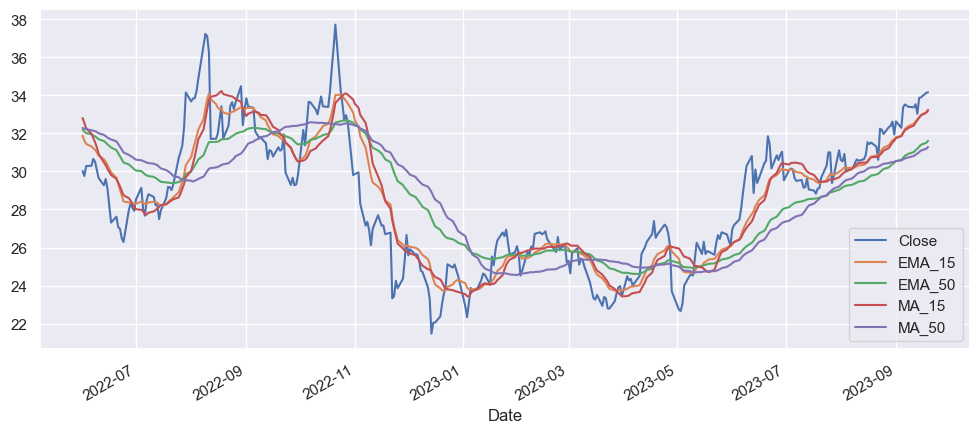

In [42]:
petrobras_2206['EMA_15'] = petrobras['Close'].ewm(span=15, adjust=False).mean()
petrobras_2206['EMA_50'] = petrobras['Close'].ewm(span=50, adjust=False).mean()

petrobras_2206[['Close', 'EMA_15', 'EMA_50', 'MA_15', 'MA_50']].plot()

### Cálculo de mudança percentual

In [43]:
petrobras['Close'].resample('Y').mean().pct_change()

Date
2010-12-31         NaN
2011-12-31   -0.198232
2012-12-31   -0.105284
2013-12-31   -0.143997
2014-12-31   -0.085912
2015-12-31   -0.412560
2016-12-31    0.099469
2017-12-31    0.355779
2018-12-31    0.437842
2019-12-31    0.297472
2020-12-31   -0.181426
2021-12-31    0.204371
2022-12-31    0.141730
2023-12-31   -0.101516
Freq: A-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

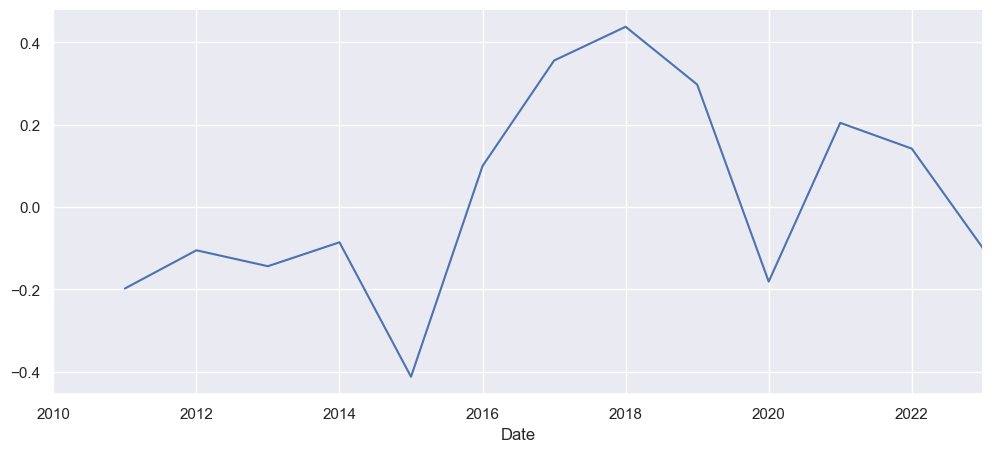

In [44]:
petrobras['Close'].resample('Y').mean().pct_change().plot()

In [45]:
petrobras['Close'].resample('M').mean().pct_change()

Date
2010-01-31         NaN
2010-02-28   -0.062200
2010-03-31    0.069397
2010-04-30   -0.049516
2010-05-31   -0.149799
                ...   
2023-05-31   -0.015393
2023-06-30    0.173525
2023-07-31   -0.000992
2023-08-31    0.049606
2023-09-30    0.071390
Freq: M, Name: Close, Length: 165, dtype: float64

<Axes: xlabel='Date'>

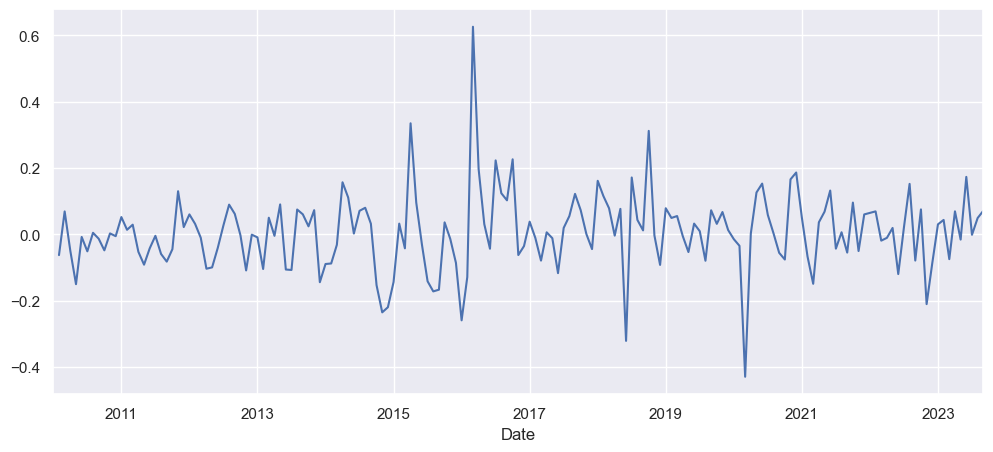

In [46]:
petrobras['Close'].resample('M').mean().pct_change().plot()

<Axes: xlabel='Date'>

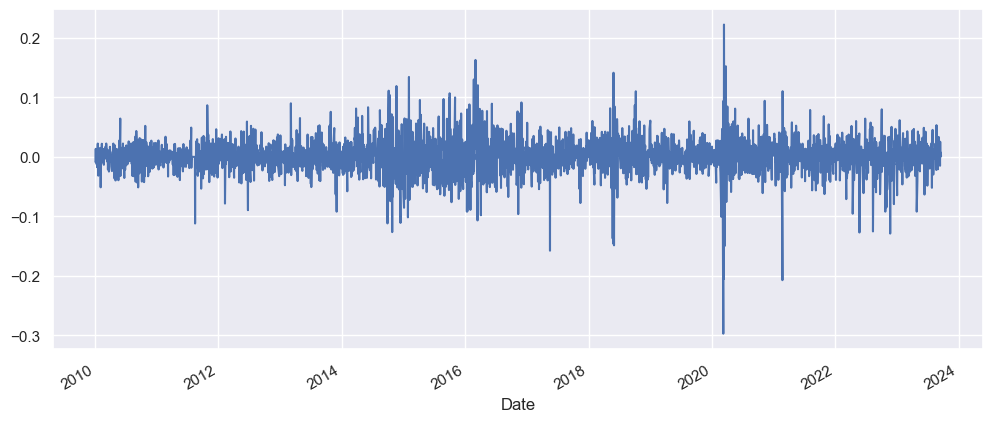

In [47]:
petrobras['Close'].pct_change().plot()
